##### Import pandas Library :

In [61]:
import pandas as pd

##### Read File :

In [62]:
chc = pd.read_csv(r"C:\Users\PALLAVI\Documents\Avg_Monthly_Cycle_Hiring_Count.csv") 

In [63]:
chc.head()

,Year_Month,Cycle_Hiring_Count
0,2001-01,648
1,2001-02,646
2,2001-03,639
3,2001-04,654
4,2001-05,630


In [64]:
chc.tail()

,Year_Month,Cycle_Hiring_Count
109,2010-02,1425
110,2010-03,1419
111,2010-04,1432
112,2010-05,1394
113,2010-06,1327


##### Import matplotlib Library :

In [65]:
import matplotlib.pyplot as plt

##### Plot graph of Cycle Hiring Count :

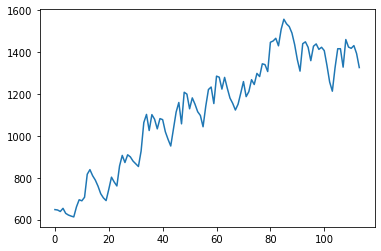

In [66]:
plt.plot(chc.Cycle_Hiring_Count)

##### Here series is not a Stationary Series :


##### Do First Differencing :

In [67]:
chc.Cycle_Hiring_Count.diff()


0       NaN
1      -2.0
2      -7.0
3      15.0
4     -24.0
       ... 
109   -36.0
110    -6.0
111    13.0
112   -38.0
113   -67.0
Name: Cycle_Hiring_Count, Length: 114, dtype: float64

##### Plot of Cycle_Hiring_Count After First Differencing :

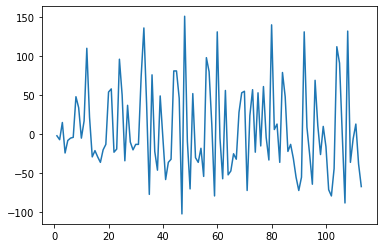

In [68]:
plt.plot(chc.Cycle_Hiring_Count.diff())

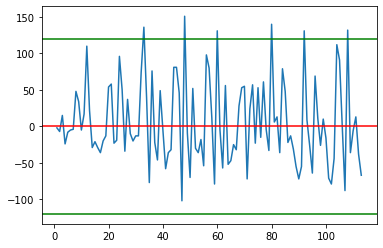

In [69]:
plt.plot(chc.Cycle_Hiring_Count.diff())
plt.axhline(y = 0 , color = "r")
plt.axhline(y = 120 , color = "g")
plt.axhline(y = -120 , color = "g")

##### Here Variance is not same :

##### Import numpy Library :

In [70]:
import numpy as np

##### Take Log Of Original Data :

In [71]:
chc_log = np.log(chc.Cycle_Hiring_Count)

##### Plot Of Logarithmic Data :

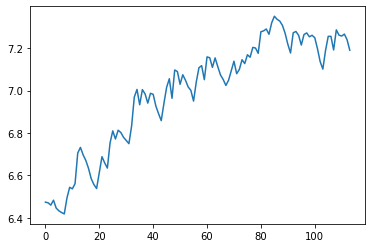

In [72]:
plt.plot(chc_log)

##### First Level Differncing of Logarithmic Data :

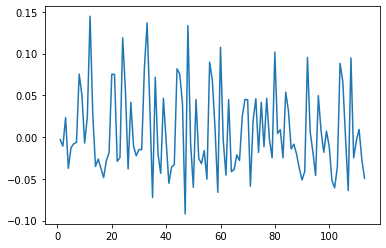

In [73]:
plt.plot(chc_log.diff())

##### Plot Of Logarithmic Data :

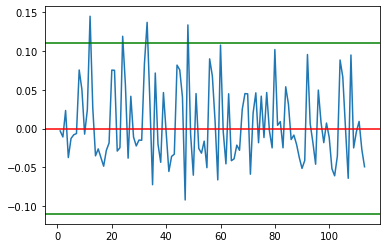

In [74]:
plt.plot(chc_log.diff())
plt.axhline(y = 0 , color = "r")
plt.axhline(y = .11, color = "g")
plt.axhline(y = -.11, color = "g")

##### Here Mean , Variance are almost Same :
#### So , the Series is now Stationary :

##### Import statsmodels , plot_acf, plot_pacf :

In [75]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

##### Plot Of ACF :

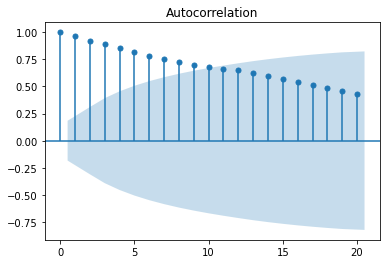

In [76]:
plot_acf(chc_log , lags = 20);

##### Plot Of PACF :

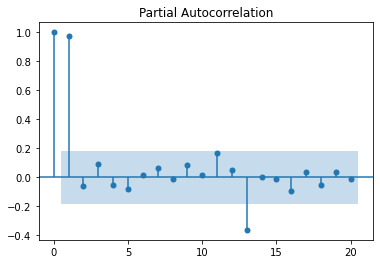

In [77]:
plot_pacf(chc_log , lags = 20);

##### Here ACF is declined slowely / gradually and PACF is declined sharply.
##### So it is a AR(2) process :

##### Import ARIMA :

In [78]:
from statsmodels.tsa.arima_model import ARIMA

##### Build Model :

In [79]:
chc_model = ARIMA(chc_log , order = (2, 1, 0))

C:\Users\PALLAVI\Anaconda3\Workshop\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


##### Fit The Model :

In [80]:
result = chc_model.fit()

##### FindOut the values of Constants / Beta values :

In [81]:
result.params

const                         0.006544
ar.L1.D.Cycle_Hiring_Count   -0.009463
ar.L2.D.Cycle_Hiring_Count   -0.237987
dtype: float64

##### Do Prediction /  Forecast the values :

In [82]:
forecast_chc_Values = result.forecast(steps = 5)
forecast_chc_Values

(array([7.20570602, 7.2254495 , 7.22984904, 7.23327202, 7.2403559 ]),
 array([0.04938981, 0.06951805, 0.07883256, 0.08725235, 0.09606328]),
 array([[7.10890378, 7.30250826],
        [7.08919662, 7.36170237],
        [7.07534005, 7.38435802],
        [7.06226057, 7.40428348],
        [7.05207532, 7.42863647]]))

In [83]:
forecast_chc_Values[0]

array([7.20570602, 7.2254495 , 7.22984904, 7.23327202, 7.2403559 ])

##### Take Antilog Of Logarithmic Data :

In [84]:
Forecast_in_original_scale = np.exp(forecast_chc_Values[0])

##### Print Forecast_in_original_scale :

In [85]:
Forecast_in_original_scale

array([1347.09542901, 1373.95606513, 1380.01415592, 1384.7460178 ,
       1394.59021506])

##### ...................................................Thank You...............................................................................

###### .......................................End :.........................................................................................